In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import glob
import math
from imutils.object_detection import non_max_suppression



(123, 79, 3)


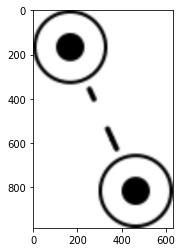

In [2]:
img = cv2.imread("test.png")
print(img.shape)
img = cv2.resize(img,(img.shape[1]*8,img.shape[0]*8))
plt.imshow(img)


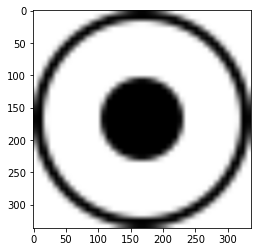

In [3]:
template = cv2.imread("template.png")
template = cv2.resize(template,(template.shape[1]*8,template.shape[0]*8))

plt.imshow(template)
(tH, tW) = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[INFO] 162 matched locations *before* NMS
No of template matched locations 162


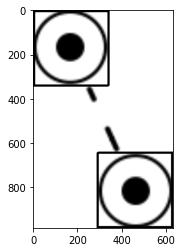

In [4]:

result = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.8)
number_of_templates_matched = 0
clone = img.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))
for (x, y) in zip(xCoords, yCoords):
    	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(0), 1)
	number_of_templates_matched = number_of_templates_matched + 1

print("No of template matched locations",number_of_templates_matched)
plt.imshow(clone,cmap="gray")


[INFO] 2 matched locations *after* NMS
[(464, 816), (168, 177)] shape of image (984, 632)


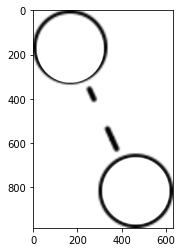

In [5]:
rects = []
clone2 = img.copy()
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
centers = [ ]
temp = ()
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	# cv2.rectangle(clone2, (startX, startY), (endX, endY),
		# (0), 1)
	temp = (int((startX+endX)/2), int((startY+endY)/2))
	image = cv2.circle(clone2, temp, int(0.9*((endX-startX)/2)), (255), -1)
	centers.append(temp)

# show the output image
plt.imshow(clone2,cmap="gray")
print(centers,"shape of image",img.shape)

In [6]:

center1 = centers[0]#i
center2 = centers[1]#j
x1 = center2[0]
y1 = center2[1]
x2 = center1[0]
y2 = center1[1]
print(center1,center2)
print(y2-y1)
pixels_in_line = []
rate = (y2-y1)/math.sqrt((x2-x1)**2+(y2-y1)**2)
print(rate)
if(x2>x1):

    for y in np.arange(y1,y2,rate):

        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
        print(y,x)
        pixels_in_line.append(clone2[int(y)][int(x)])
        
else:

    for x in np.arange(x2,x1,rate):
        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
    
        pixels_in_line.append(clone2[int(y)][int(x)])

(464, 816) (168, 177)
639
0.9073766577749741
177.0 168.0
177.90737665777496 168.42031845180185
178.81475331554992 168.84063690360372
179.72212997332488 169.26095535540557
180.62950663109984 169.68127380720745
181.5368832888748 170.1015922590093
182.44425994664977 170.52191071081117
183.35163660442473 170.94222916261302
184.2590132621997 171.36254761441486
185.16638991997465 171.78286606621674
186.0737665777496 172.2031845180186
186.98114323552457 172.62350296982046
187.88851989329953 173.0438214216223
188.7958965510745 173.4641398734242
189.70327320884945 173.88445832522603
190.6106498666244 174.30477677702788
191.51802652439937 174.72509522882976
192.42540318217434 175.1454136806316
193.3327798399493 175.56573213243348
194.24015649772426 175.98605058423533
195.14753315549922 176.4063690360372
196.05490981327418 176.82668748783905
196.96228647104914 177.24700593964093
197.8696631288241 177.66732439144278
198.77703978659906 178.08764284324462
199.68441644437402 178.5079612950465
200.591

In [7]:
print(pixels_in_line)
threshold = 200
imp_data = []
flag = False
flag2 = True
for pixel in pixels_in_line:
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data.append(pixel)
flag = False
flag2 = True
imp_data1 = []
for pixel in reversed(imp_data):
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data1.append(pixel)
imp_data1.reverse()
print("\n\n\n",imp_data1)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 6, 16, 42, 66, 91, 122, 148, 183, 210, 218, 233, 236, 241, 244, 247, 250, 252, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 246, 240, 235, 226, 218, 197, 187, 159, 147, 135, 106, 94, 68, 57, 57, 33, 24, 6, 7, 0, 0, 0, 0, 0, 

In [8]:

# perspective_images = []
# # (startX, startY, endX, endY)
# for i in range(len(pick)-1):

#     pts1 = np.float32([[pick[i][0],pick[i][3]],[pick[i][2],pick[i][1]],[pick[i+1][0],pick[i+1][3]],[pick[i+1][2],pick[i+1][1]]])
#     pts2 = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
#     M = cv2.getPerspectiveTransform(pts1,pts2)
#     dst = cv2.warpPerspective(clone2,M,perspective_frame)
#     perspective_images.append(dst)
#     plt.figure()

#     plt.imshow(dst,cmap="gray")
  

# plt.show()


In [9]:
mag = math.sqrt((x2-x1)**2+(y2-y1)**2)
line = (((x2-x1))/mag,((y2-y1))/mag)
perpendicular = (line[0],-1*line[1])


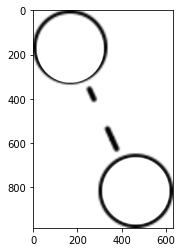

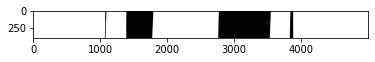

In [10]:
width = 1

plt.imshow(clone2,cmap="gray")
perspective_frame = (5000,400)

point1 = [x1+width*perpendicular[0],y1+width*perpendicular[1]]
point2 = [x2+width*perpendicular[0],y2+width*perpendicular[1]]
point3 = [x1-width*perpendicular[0],y1-width*perpendicular[1]]
point4 = [x2-width*perpendicular[0],y2-width*perpendicular[1]]


points = np.float32([point1,point2,point3,point4])
paper = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
M = cv2.getPerspectiveTransform(points,paper)
dst = cv2.warpPerspective(clone2,M,perspective_frame)
plt.figure()
# print(points,clone2)
_,dst = cv2.threshold(dst,20,255,cv2.THRESH_BINARY)
plt.imshow(dst,cmap="gray")
# print(dst)

In [48]:
code = dst[0]
section = len(code)/8
print(dst[0])

[255 255 255 ... 255 255 255]


In [49]:
for i  in range(len(code)-1):
    if(code[i] ==0 and code[i+1] == 255):
        code = code[i+1:len(code)-1]
        break
    


In [50]:
for i in range(len(code)-1, 0, -1):
    if(code[i] == 0 and code[i-1] == 255):
        code = code[0:i-1]
        break
    

In [51]:
print(code)

[255 255 255 ... 255 255 255]


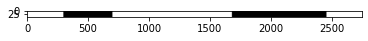

In [55]:
final_code = [code]*50
plt.imshow(final_code,cmap="gray")

In [62]:
step_size = int(len(code)/8)
ans =[]
for i in range(8):
    temp = np.mean(code[i*step_size:(i+1)*step_size])
    ans.append(temp)



In [63]:
print(ans)

[221.54518950437318, 0.0, 244.59183673469389, 255.0, 228.23615160349854, 0.0, 0.0, 215.59766763848395]
